<a href="https://colab.research.google.com/github/SaiDhanyaa/Multiple-Linear-Regression/blob/main/Modeling_Fuel_Efficiency_A_Multiple_Linear_Regression_Analysis_on_Vehicle_Characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Fuel Efficiency: A Multiple Linear Regression Analysis on Vehicle Characteristics

### Primary Objective:
• To enhance vehicle design and manufacturing processes to improve fuel efficiency.

### Specific Task:
• Develop a predictive model that can estimate a car's miles per gallon (MPG) based on its cabin space volume (VOL), engine horsepower (HP), top speed (SP), and weight (WT).

### Expected Outcome:
• A model that helps in understanding how different car characteristics affect fuel efficiency.

• Insights from this model could inform design decisions to create more fuel-efficient vehicles, leading to cost savings for consumers and reduced environmental impact.

• Car manufacturers can use the model to predict and improve the MPG of future car models, thereby gaining a competitive advantage in the market by offering more efficient cars.

## 1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## 2. IMPORT DATA

In [ ]:
cars_data = pd.read_csv("Cars.csv")
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. DATA UNDERSTANDING

### Perform Initial Analysis

In [ ]:
cars_data.shape

(81, 5)

In [ ]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## 4. ASSUMPTION CHECKS

### 4.1 ASSUMPTION:1 Linearity Check

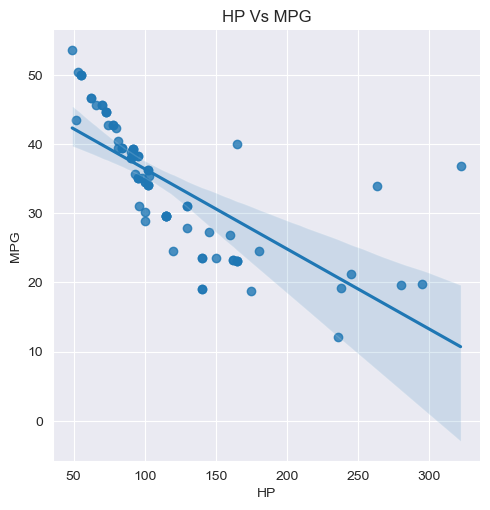

In [ ]:
# Linear model - lm plot
# HP vs MPG
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

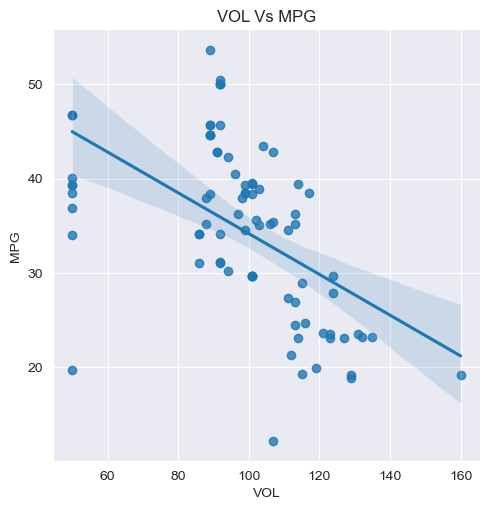

In [ ]:
# VOL vs MPG
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

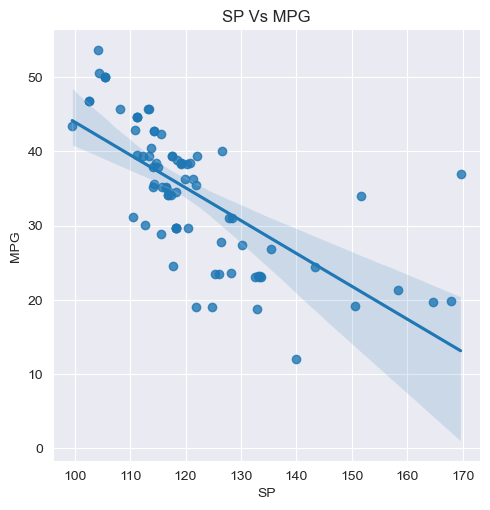

In [ ]:
# SP vs MPG
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

None of the features follow linearity. But we know that according to our knowledge when HP increases, MPG decreases and WT increases, MPG decreases..
But our data is not behaving in that way. So, if our intuition is correct, we cannot go with it. We need to follow the data----"DATA DRIVEN APPROACH"

##### Linearity Test is Failed.

### 4.2 ASSUMPTION:2 Normality Check

##### a) kernel density KDE plot

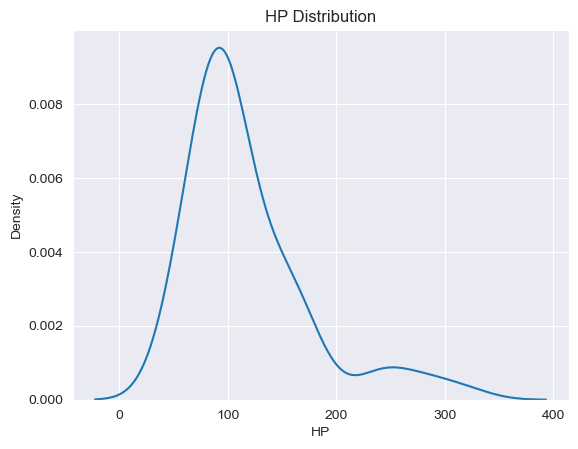

In [ ]:
# HP distribution
sns.kdeplot(data=cars_data,x='HP')
plt.title('HP Distribution')
plt.show()

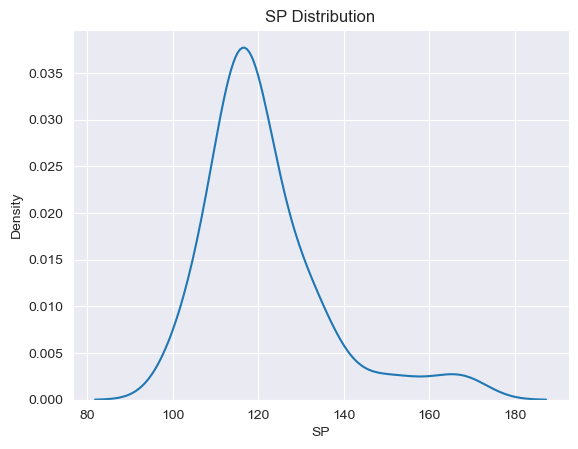

In [ ]:
# SP distribution
sns.kdeplot(data=cars_data,x='SP')
plt.title('SP Distribution')
plt.show()

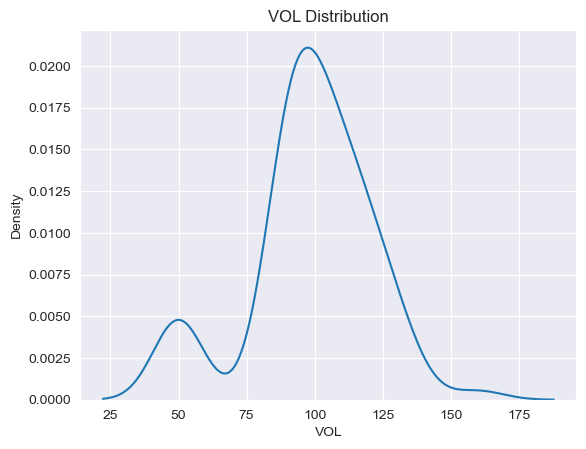

In [ ]:
# VOL distribution
sns.kdeplot(data=cars_data,x='VOL')
plt.title('VOL Distribution')
plt.show()

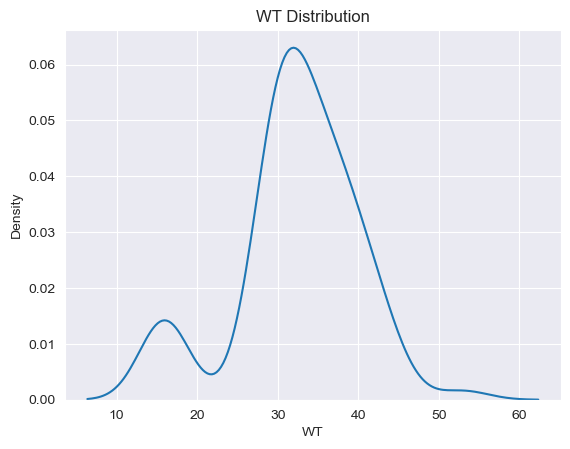

In [ ]:
# WT distribution
sns.kdeplot(data=cars_data,x='WT')
plt.title('WT Distribution')
plt.show()

##### b) Histogram hist plot

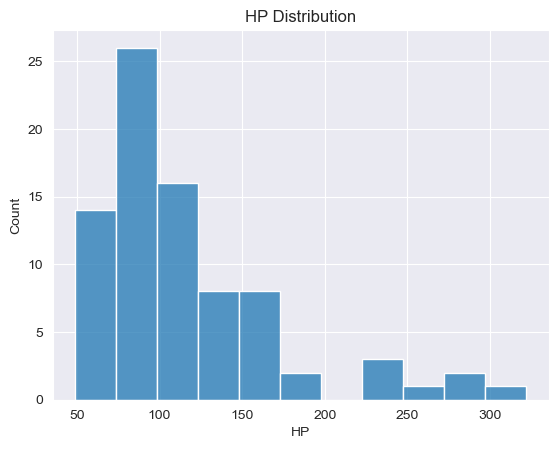

In [ ]:
# HP distribution
sns.histplot(data=cars_data,x='HP')
plt.title('HP Distribution')
plt.show()

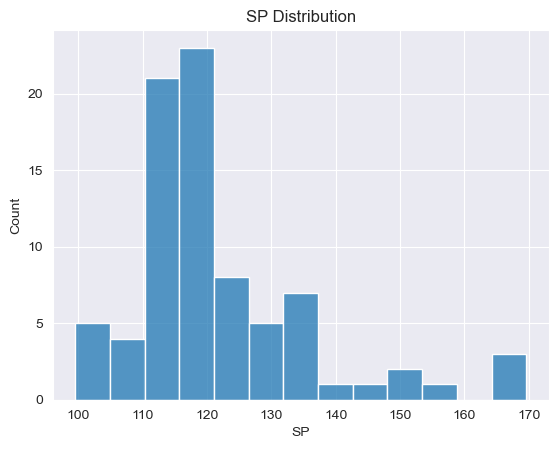

In [ ]:
# SP distribution
sns.histplot(data=cars_data,x='SP')
plt.title('SP Distribution')
plt.show()

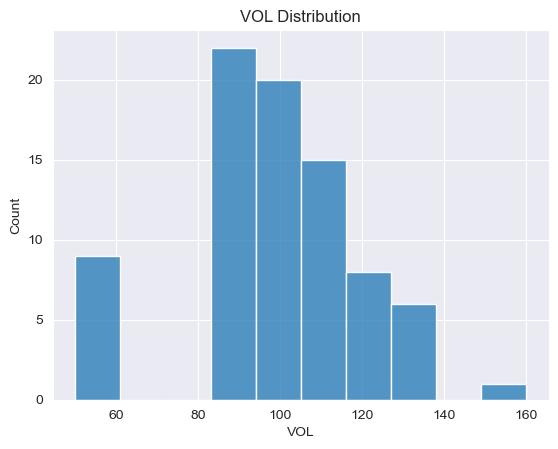

In [ ]:
# VOL distribution
sns.histplot(data=cars_data,x='VOL')
plt.title('VOL Distribution')
plt.show()

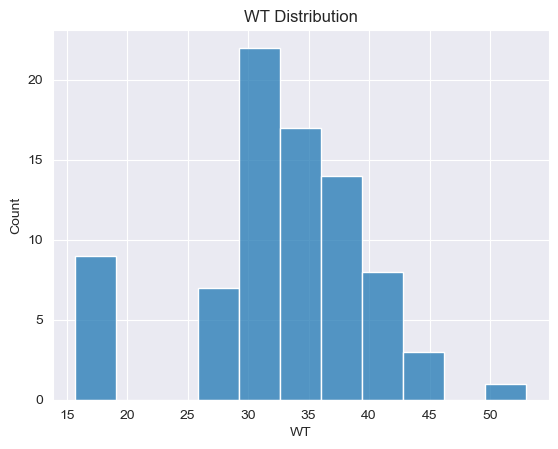

In [ ]:
# WT distribution
sns.histplot(data=cars_data,x='WT')
plt.title('WT Distribution')
plt.show()

##### c) probability prob plot

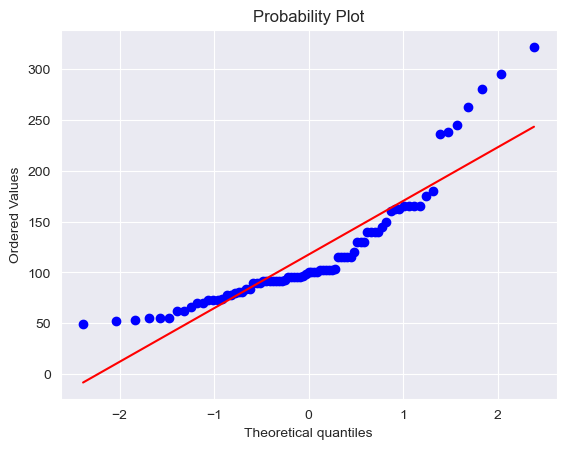

In [ ]:
# HP distribution
stats.probplot(x = cars_data['HP'],plot = plt)
plt.show()

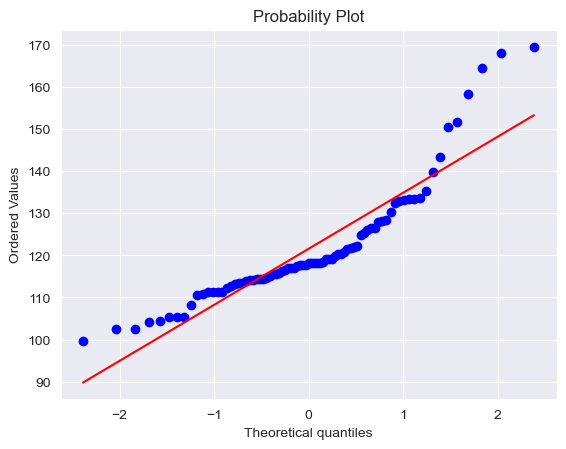

In [ ]:
# SP distribution
stats.probplot(x = cars_data['SP'],plot = plt)
plt.show()

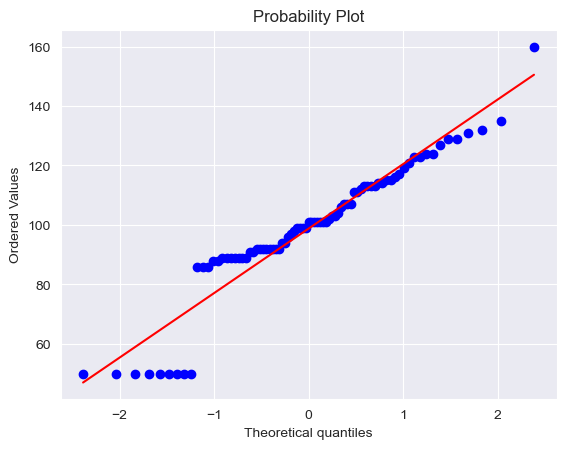

In [ ]:
# VOL distribution
stats.probplot(x = cars_data['VOL'],plot = plt)
plt.show()

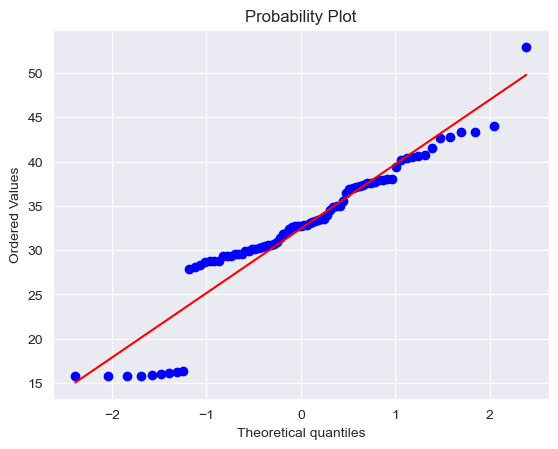

In [ ]:
# WT distribution
stats.probplot(x = cars_data['WT'],plot = plt)
plt.show()

None of the plots follow normal distribution.
##### Normality Test is Failed.

#### 4.3 ASSUMPTION:3 No Autoregression

No inputs are showing timedate format. So it is passed!

#### 4.4 ASSUMPTION:4 NO Multicollinearity

##### a) Correlation matrix

In [ ]:
corr_matrix=cars_data.corr()
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
# HP vs MPG: -ve Association
# HP vs VOL: +ve association
# HP vs SP: +ve association
# HP vs WT: +ve association

# MPG vs VOL: -ve association
# MPG vs SP: -ve association
# MPG vs WT: -ve association

# VOL vs SP: +ve association
# VOL vs WT: +ve association

# INSIGHTS:
# Our 'y' variable is MPG, all the association with y are -ve association

# high VOL---less Mileage
# high SP----less mileage
# high horse power----less Mileage
# High weight--- less mileage

# so -ve association holds good!!!!!

##### b) Heatmaps

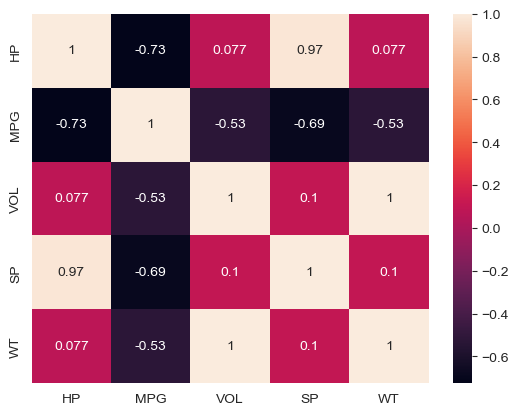

In [ ]:
sns.heatmap(data=corr_matrix,annot= True)
plt.show()

##### c) Scatterplot between variables along with histograms

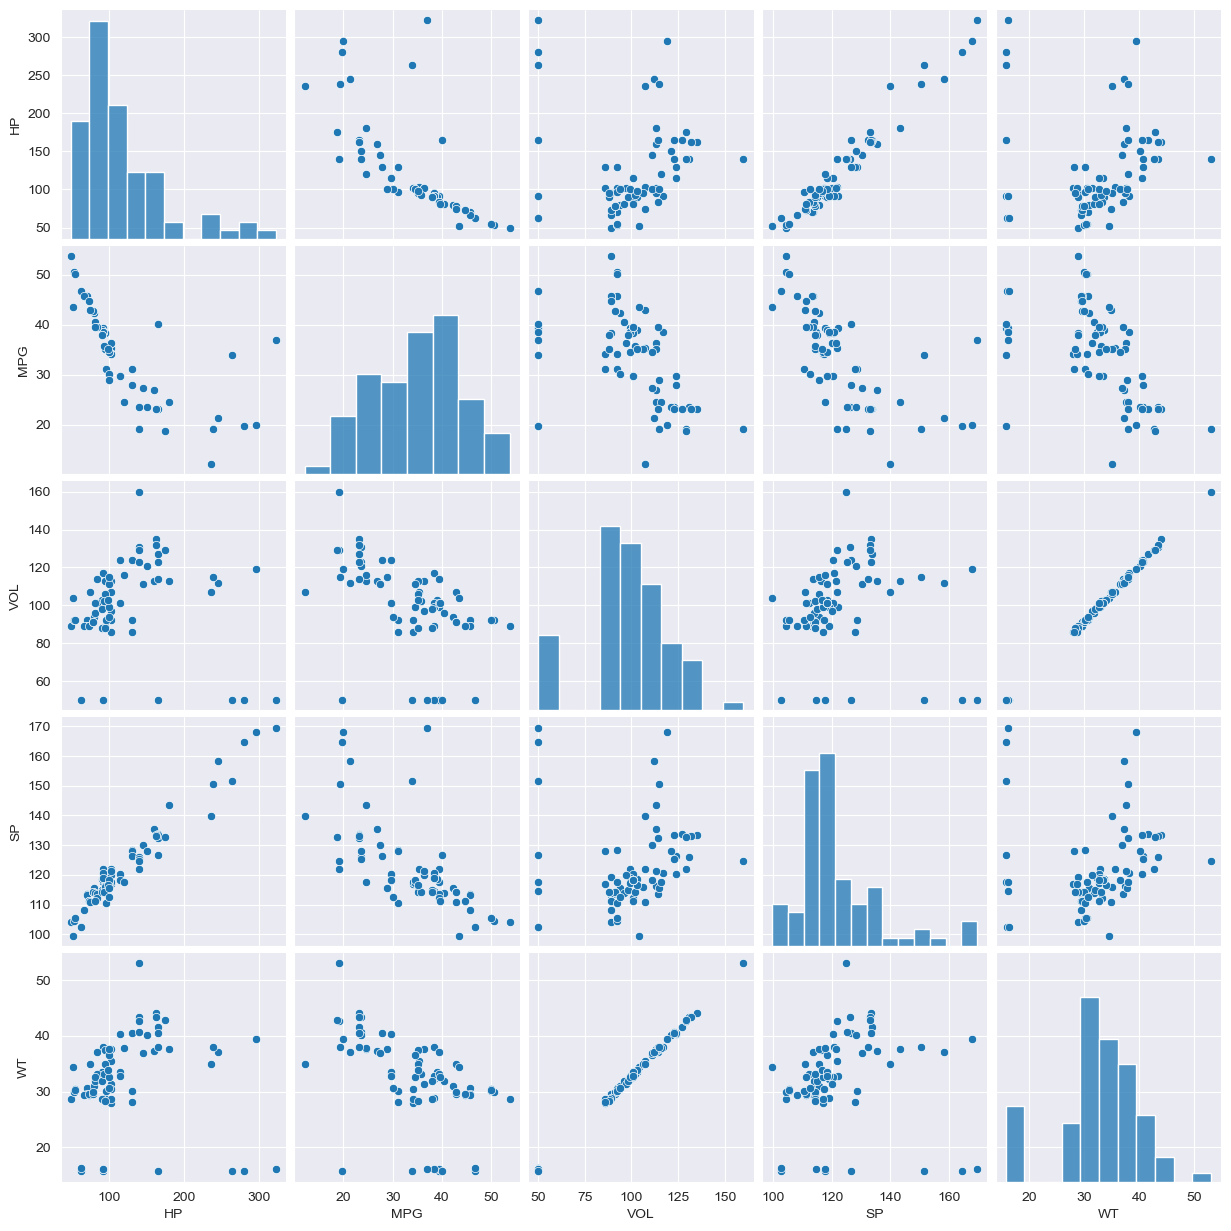

In [ ]:
#Format the plot backgroud and scatterplots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars_data)

###### we can see that SP-HP and VOL-WT are highly correlated. So TEST FAILED!

## 5. PREPARING A MODEL using Statsmodels

### a) Model Building -----input -output split

our regression equation is
MPG= Bo + B1x1 +B2x2 + B3x3 + B4x4

In [ ]:
import statsmodels.formula.api as smf
cars_data.head()
linear_model_stats = smf.ols('MPG~HP + VOL + SP + WT',data = cars_data)

### b) Model Training

In [ ]:
linear_model_stats = linear_model_stats.fit()

### c) Evaluation Metrics of Linear Regression

In [ ]:
print('R2Score     :',linear_model_stats.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats.pvalues)

R2Score     : 0.7705
Adj.R2Score : 0.7585
AIC Value   : 477.9279
BIC Value   : 489.9002
P-Value     :
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


### d) Hypothesis Testing:
Ho= B1=0(slope=0)
Ha= B1!= 0(Slope not equal to 0)

If P<alpha i.e P<0.05, then Reject Ho and accept Ha------>>It means that the slope of that variable is SIGNIFICANT

If P>alpha i.e P>0.05, then Accept Ho-------------------->>It means that the slope of that variable is NOT SIGNIFICANT

P-Value     :

Bo= Intercept    0.042936--NOT REQUIRED TO CHECK

B1= HP           0.000001----P<0.05, then Reject Ho and accept Ha--->>It means that the slope of that HP is SIGNIFICANT

B2= SP           0.014579----P<0.05, then Reject Ho and accept Ha--->>It means that the slope of that SP is SIGNIFICANT

B3= VOL          0.556294----P>0.05, then Accept Ho---->>It means that the slope of that VOL is NOT SIGNIFICANT

B4= WT           0.813649----P>0.05, then Accept Ho---->>It means that the slope of that WT is NOT SIGNIFICANT

So based on the p-value modify the regression equation:
________________________________________________
MPG= Bo + B1HP + B2SP ------>>MODIFIED EQUATION |
_-----------------------------------------------
But is it fine to go only with HP &SP?

NO

Because VOL & WT also have some considerable impact on MPG(As per domain knowledge)

So Build a simple linear regression equation
1) MPG vs VOL
2) MPG vs WT
3) And build Multiple linear Regression with MPG vs VOL & WT

## 6. BUILD SEPARATE LINEAR REGRESSION MODELS

In [ ]:
#### MPG vs VOL

# MODEL BUILDING:
m1_vol= smf.ols('MPG~VOL', data= cars_data)
# Model Training:
m1_vol= m1_vol.fit()
# Evaluation Metrics of Linear Regression:
print('R2Score     :',m1_vol.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',m1_vol.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',m1_vol.aic.round(4)) #Error Impurity
print('BIC Value   :',m1_vol.bic.round(4)) #Error Impurity
print('P-Value     :\n',m1_vol.pvalues)

R2Score     : 0.2799
Adj.R2Score : 0.2708
AIC Value   : 564.5634
BIC Value   : 569.3523
P-Value     :
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


P<0.05, --->>It means that the slope of that VOL is SIGNIFICANT

In [ ]:
# MPG vs WT

# MODEL BUILDING:
m1_wt= smf.ols('MPG~WT', data= cars_data)
# Model Training:
m1_wt= m1_wt.fit()
# Evaluation Metrics of Linear Regression:
print('R2Score     :',m1_wt.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',m1_wt.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',m1_wt.aic.round(4)) #Error Impurity
print('BIC Value   :',m1_wt.bic.round(4)) #Error Impurity
print('P-Value     :\n',m1_wt.pvalues)

R2Score     : 0.2775
Adj.R2Score : 0.2683
AIC Value   : 564.8358
BIC Value   : 569.6247
P-Value     :
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


P<0.05, --->>It means that the slope of that WT is SIGNIFICANT

In [ ]:
# Multiple linear regression
# MPG vs VOL+WT

# MODEL BUILDING:
m1_vol_wt= smf.ols('MPG~VOL+WT', data= cars_data)
# Model Training:
m1_vol_wt= m1_vol_wt.fit()
# Evaluation Metrics of Linear Regression:
print('R2Score     :',m1_vol_wt.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',m1_vol_wt.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',m1_vol_wt.aic.round(4)) #Error Impurity
print('BIC Value   :',m1_vol_wt.bic.round(4)) #Error Impurity
print('P-Value     :\n',m1_vol_wt.pvalues)

R2Score     : 0.2821
Adj.R2Score : 0.2637
AIC Value   : 566.3146
BIC Value   : 573.4979
P-Value     :
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


P>0.05, --->>It means that the slope of that VOL & WT is NOT SIGNIFICANT

So there is a issue with Vol & WT. Lets go back and check the scatter plot and analyse what is the issue.

There is high +ve association between these.

High correlation.

This is called 'Collinearity'.

Due to this multicollinearity between variables, the significant variable becomes insignificant.


## 7. DETECTING MULTICOLLINEARITY EFFECT
 2 Techniques for measuring collinearity

 1. Correlation matrix
 2. VIF Factor

#### a) Correlation matrix

In [ ]:
corr_matrix=cars_data.corr()
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


##### we can see that SP-HP and VOL-WT are highly correlated.

#### b) Variance Inflation Factor (VIF):

VIF= 1/(1-R^2)
Find VIF for each indepenent variable

If VIF Value> 20, those will create multicollinearity problems.

In [ ]:
# 1) For HP
rsq_hp = smf.ols('HP~WT+VOL+SP' , data = cars_data).fit().rsquared

vif_hp=1/(1-rsq_hp)
vif_hp

19.92658897499852

In [ ]:
# 1) For SP
rsq_sp = smf.ols('SP~WT+VOL+HP' , data = cars_data).fit().rsquared

vif_sp=1/(1-rsq_sp)
vif_sp

20.00763878305008

In [ ]:
# 1) For VOL
rsq_vol = smf.ols('VOL~WT+HP+SP' , data = cars_data).fit().rsquared

vif_vol=1/(1-rsq_vol)
vif_vol

638.8060836592878

In [ ]:
# 1) For WT
rsq_wt = smf.ols('WT~HP+VOL+SP' , data = cars_data).fit().rsquared

vif_wt=1/(1-rsq_wt)
vif_wt

639.5338175572624

In [ ]:
#storing the VIF values in a dataframe

dict_1 = {'Variables': ['HP', 'SP', 'VOL', 'WT'],
          'VIF':[vif_hp,vif_sp, vif_vol, vif_wt] }
vif_frame= pd.DataFrame(dict_1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,SP,20.007639
2,VOL,638.806084
3,WT,639.533818


## 8. RESIDUAL/ERROR ANALYSIS

1. Q-Q PLOT: TEST FOR NORMALITY OF RESIDUALS
2. RESIDUAL PLOT FOR HOMOSCEDASTICITY
3. RESIDUAL vs REGRESSORS

### 1. Q-Q PLOT: TEST FOR NORMALITY OF RESIDUALS

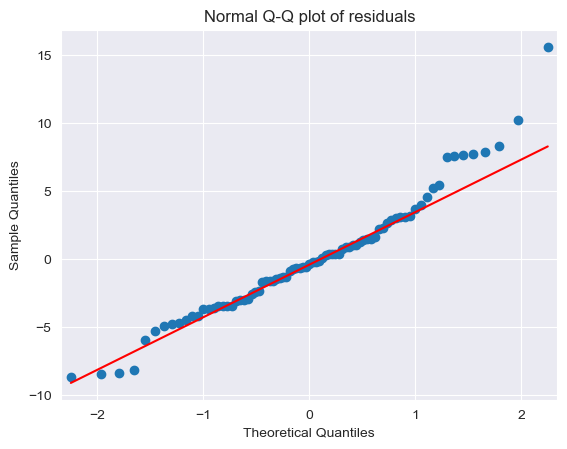

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(linear_model_stats.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(linear_model_stats.resid>10))  # Listing the datapoints which hass the quantile greater than 10

[array([ 0, 76], dtype=int64)]

### 2. RESIDUAL PLOT FOR HOMOSCEDASTICITY

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

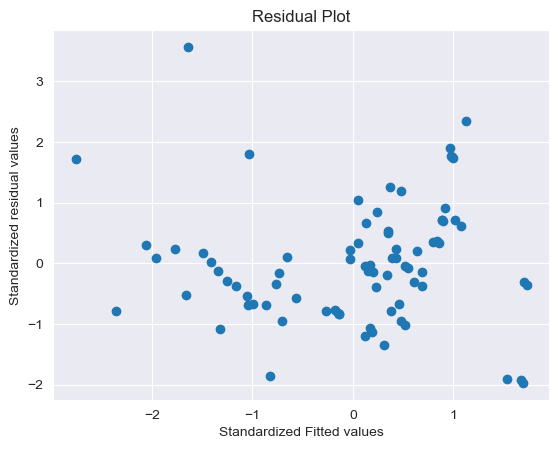

In [ ]:
plt.scatter(get_standardized_values(linear_model_stats.fittedvalues),
            get_standardized_values(linear_model_stats.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### 3. RESIDUAL vs REGRESSORS

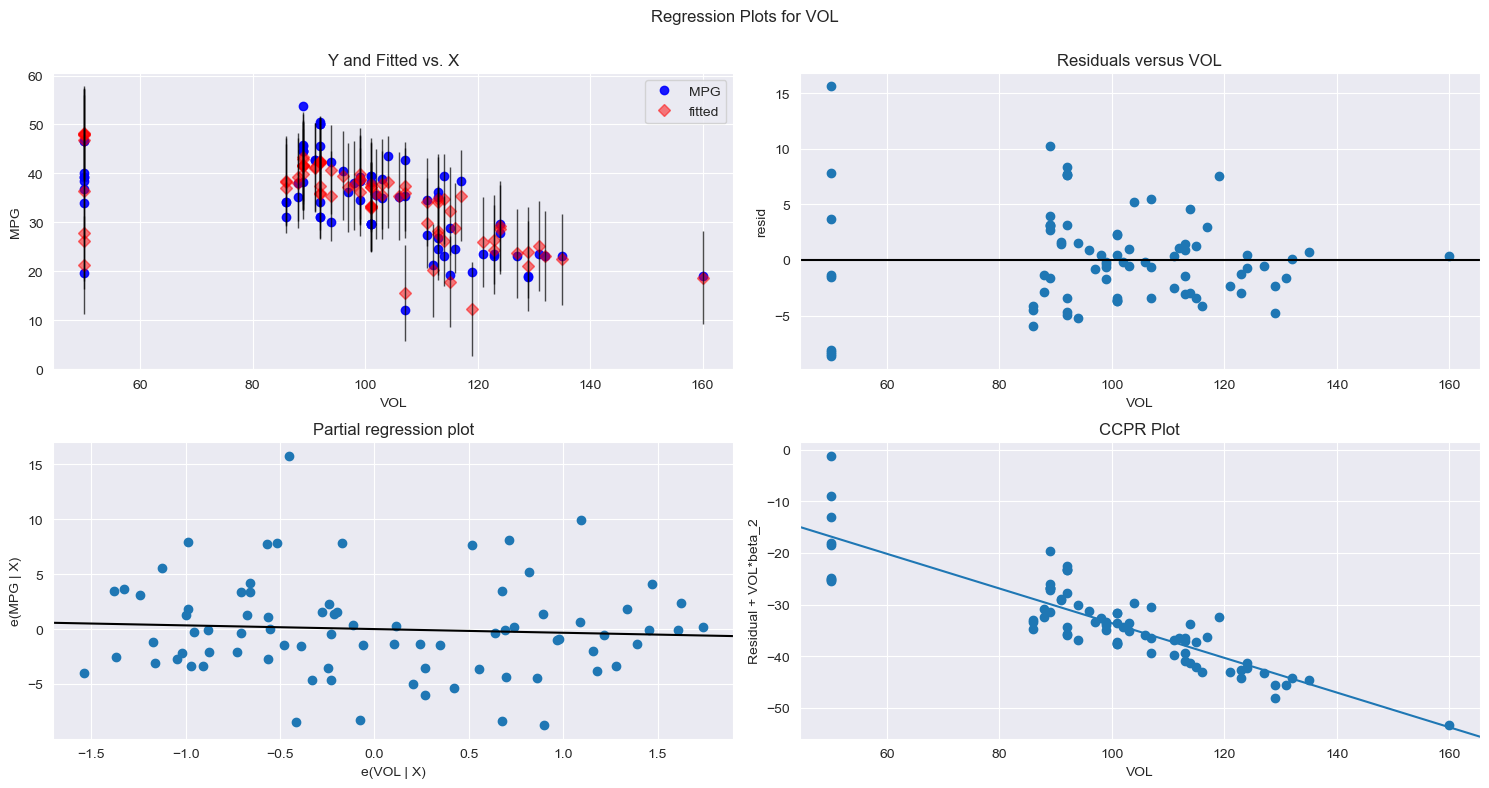

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(linear_model_stats, "VOL", fig=fig)
plt.show()

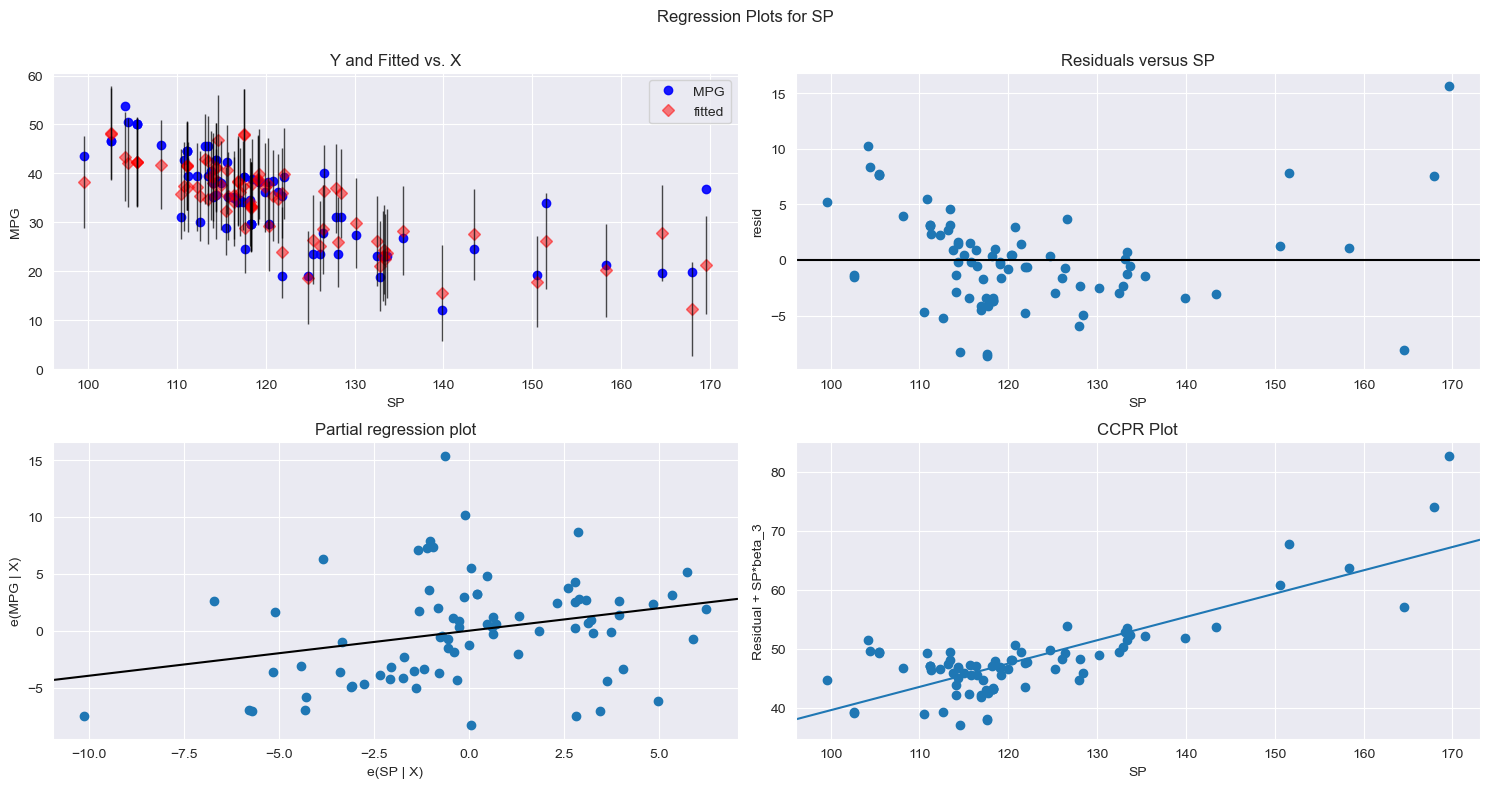

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(linear_model_stats, "SP", fig=fig)
plt.show()

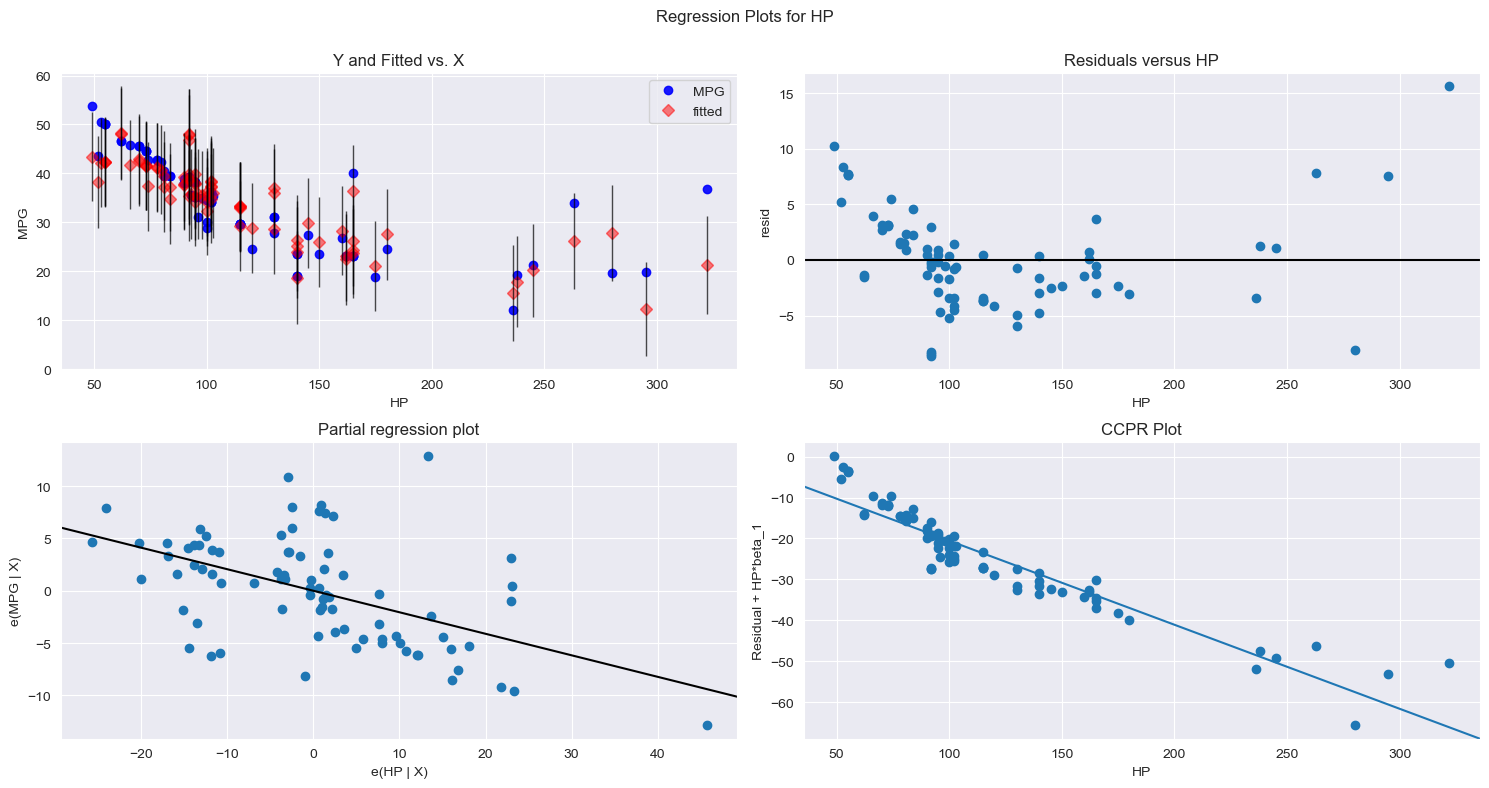

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(linear_model_stats, "HP", fig=fig)
plt.show()

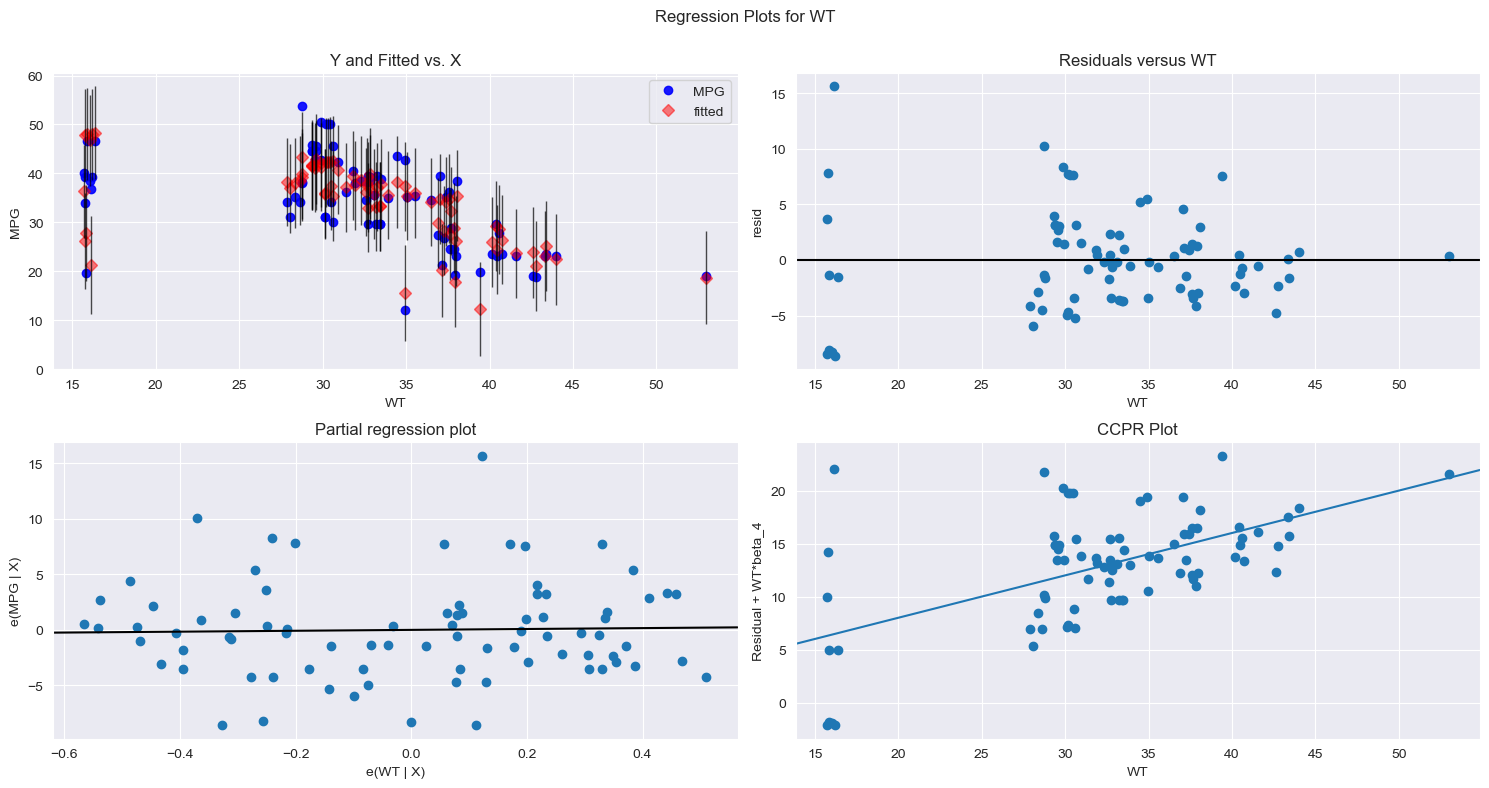

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(linear_model_stats, "WT", fig=fig)
plt.show()

## 9. MODEL DELETION DIAGNOSTICS--For detecting the outliers/Influencers

1. COOK'S DISTANCE
2. HIGH INFLUENCE PLOT/ H-LEVERAGE

### 1. COOK'S DISTANCE

It measures the difference between the regression coefficients obtained from the full data and the regression coefficients obtained by deleting the ith observation.

plot the cook's distance between (0-1).

If any value <= 1 then that is an outlier, then that can be removed.

### Why COOK'S DISTANCE? NOT BOX PLOT?

BOXPLOT for UNIVARIATE ANALYSIS---For single variable.

COOK'S DISTANCE for MULTIVARIATE ANALYSIS----For more variables.

In [ ]:
model_influ = linear_model_stats.get_influence()
(c,_) = model_influ.cooks_distance

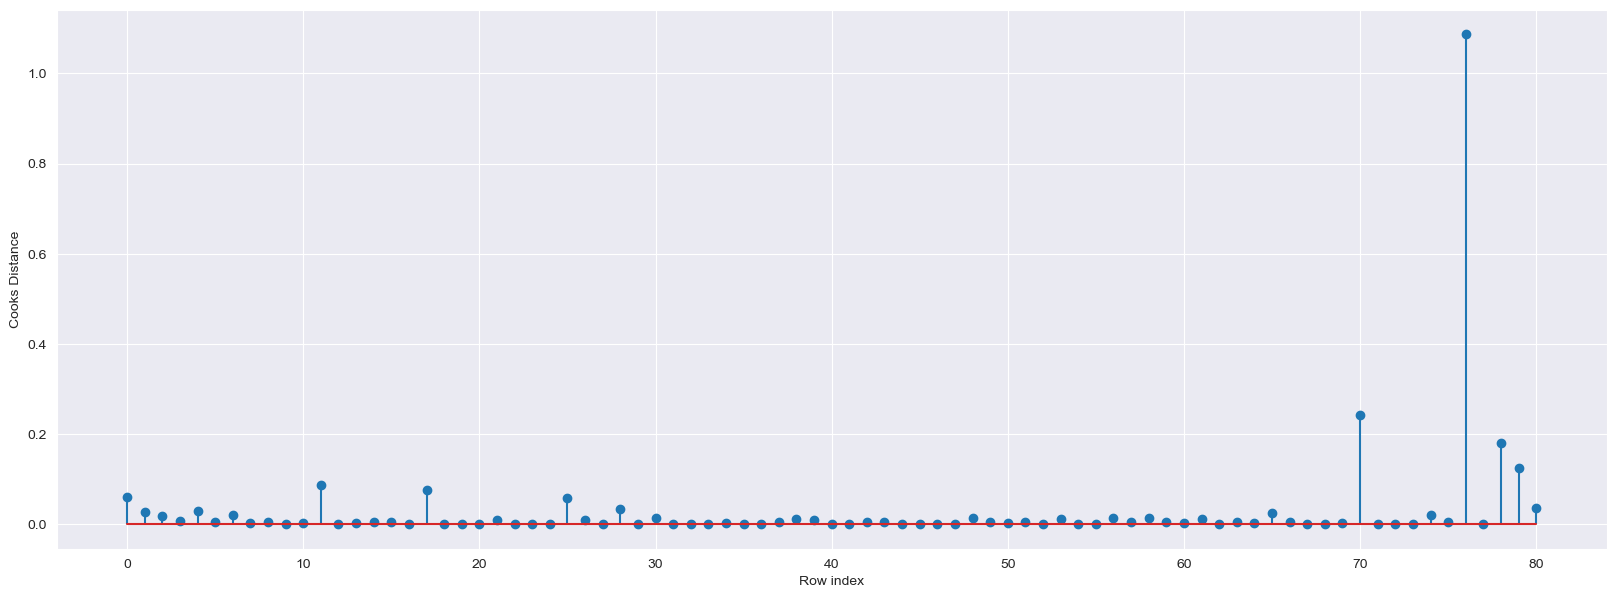

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))

# Plot the stem plot
plt.stem(np.arange(len(cars_data)), np.round(c, 3))  # Rounding off the values to 3 decimal points
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179887)

### 2.HIGH INFLUENCE PLOT/ H-LEVERAGE

Leverage: How far the datapoints are away from the rest of the group/high density area

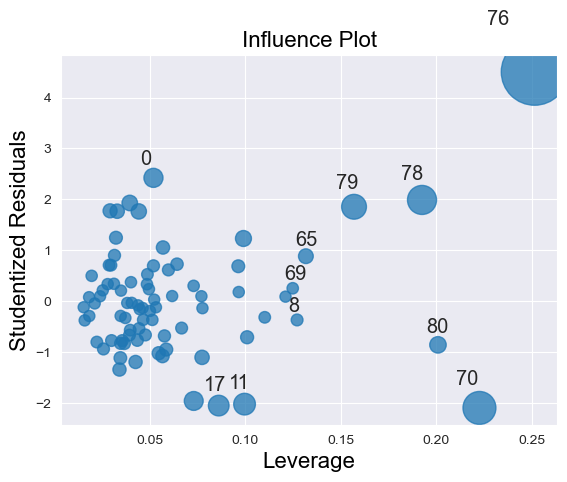

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model_stats)
plt.show()

In [ ]:
k = cars_data.shape[1]
n = cars_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
# From the above plot, it is evident that data point 70 and 76 are the influencers

In [ ]:
cars_data[cars_data.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
#See the differences in HP and other variable values
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## 10. Improving the model

1. Deleting the 70th and 76th observation:
   check the model accuracy and variable significance
2. Build the model by Discarding the variable that is involved in multicollinearity
3. Find COOK'S distance for this model remove the influential points and build the model. Do it until the cook's value comes under 1.
4. Finalise the model

### 1. Deleting the 70th and 76th observation: check the model accuracy and variable significance

In [ ]:
#Load the data
cars_data_1 = pd.read_csv("Cars.csv")

In [ ]:
#Discard the data points which are influencers and reassign the row number (reset_index())
cars_data_1=cars_data_1.drop(cars_data_1.index[[70,76]],axis=0).reset_index()

In [ ]:
#Drop the original index
cars_data_1=cars_data_1.drop(['index'],axis=1)

In [ ]:
cars_data_1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


### 2. Build the model by Discarding the variable which is involved in multicollinearity

In [ ]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_m1_vol= smf.ols('MPG~VOL+SP+HP',data = cars_data_1).fit()

In [ ]:
(final_m1_vol.rsquared,final_m1_vol.aic)

(0.8161692010376007, 446.11722639447726)

In [ ]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_m1_WT= smf.ols('MPG~WT+SP+HP',data = cars_data_1).fit()

In [ ]:
(final_m1_WT.rsquared,final_m1_WT.aic)

(0.8160034320495305, 446.1884323575031)

#### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' and Discard 'WT' so that multi collinearity problem would be resolved.

### 3. Find COOK'S distance for this model remove the influential points and build the model. Do it until the cook's value comes under 1.

In [ ]:
model_influence_vol = final_m1_vol.get_influence()
(c_vol, _) = model_influence_vol.cooks_distance

Text(0, 0.5, "COOK'S Distance")

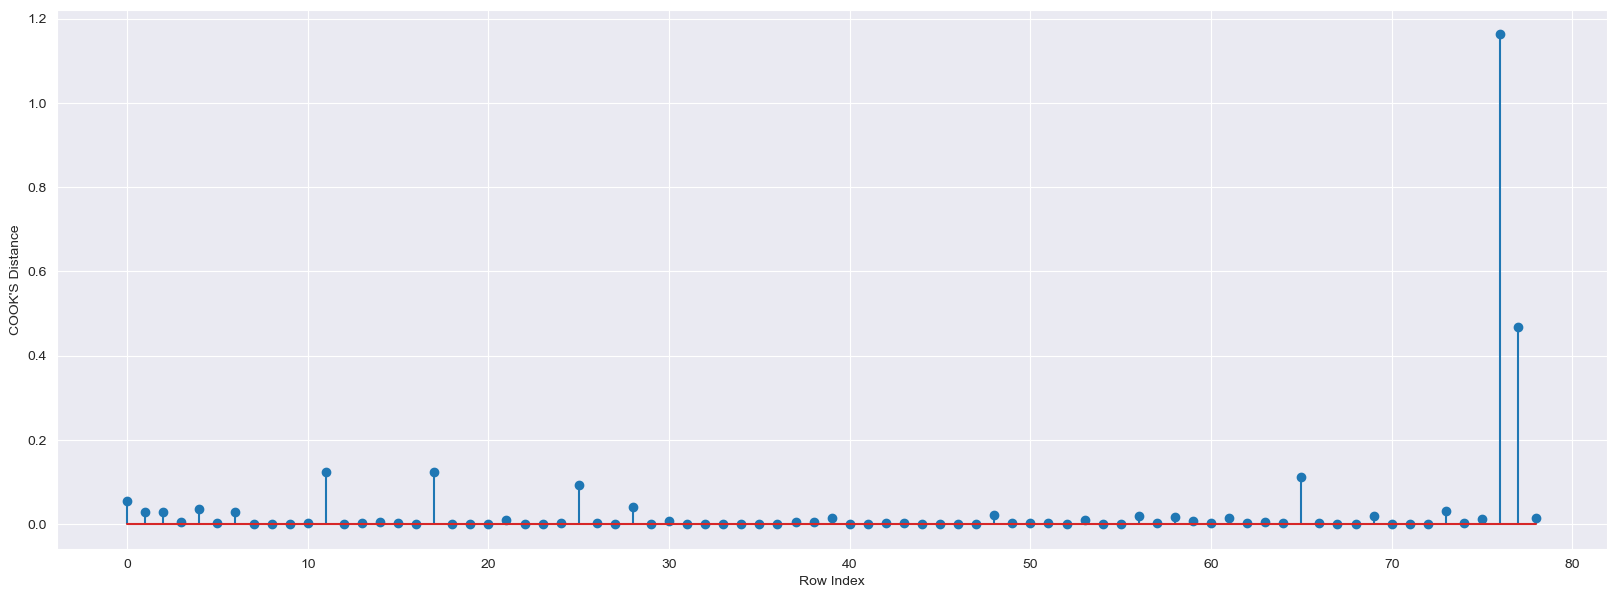

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars_data_1)), np.round(c_vol,3));
plt.xlabel('Row Index')
plt.ylabel("COOK'S Distance")

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_vol),np.max(c_vol))

(76, 1.1629387469135182)

In [ ]:
#Drop 76 observations
cars_data_2=cars_data_1.drop(cars_data_1.index[[76,77]],axis=0)

In [ ]:
cars_data_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Reset the index and re arrange the row values
cars_data_2=cars_data_2.reset_index()

In [ ]:
cars_data_2=cars_data_2.drop(['index'],axis=1)

In [ ]:
cars_data_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Build the model on the new data
final_m2_vol= smf.ols('MPG~VOL+SP+HP',data = cars_data_2).fit()

In [ ]:
#Again check for influencers
model_2_influence_vol = final_m2_vol.get_influence()
(c_vol, _) = model_2_influence_vol.cooks_distance

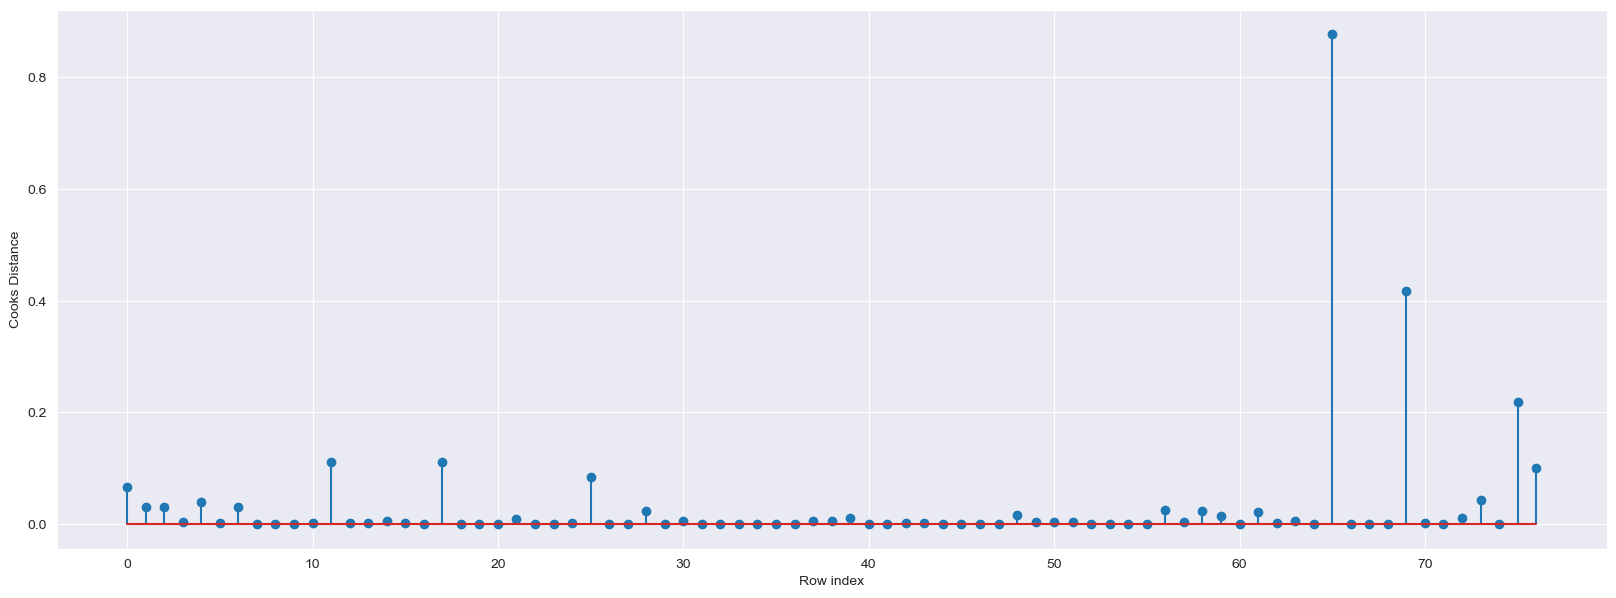

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars_data_2)),np.round(c_vol,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_vol),np.max(c_vol))

(65, 0.8774556986296786)

#### Since the cook's value= 0.877 is <1 , we can stop the diagnostic process and finalize the model

### 4.Finalise the model

In [ ]:
#Check the accuracy of the model
final_model= smf.ols('MPG~VOL+SP+HP',data = cars_data_2).fit()

In [ ]:
(final_model.rsquared,final_model.aic)

(0.8669636111859063, 409.4153062719507)

## 11.MODEL PREDICTION

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [ ]:
final_model.predict(new_data)

1    46.035594
dtype: float64

In [ ]:
# Check the final model on our old existing data
final_model.predict(cars_data.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [ ]:
pred_y = final_model.predict(cars_data)

In [ ]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64

## B) Build Linear Regression model using sklearn library

In [ ]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
#Model Building
X = cars_data.drop('MPG',axis=1)
y = cars_data[['MPG']]

In [ ]:
#Model Training
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression() #Object #Model Initialization

In [ ]:
linear_model.fit(X,y)

LinearRegression()

In [ ]:
linear_model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [ ]:
linear_model.intercept_

array([30.67733585])

In [ ]:
#6. Model Testing

In [ ]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [ ]:
y_pred = linear_model.predict(X)
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [ ]:
# 7.Model Evaluation

In [ ]:
error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


#### Homoscedasticity Check

In [ ]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns = ['HP','VOL','SP','WT'])
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [ ]:
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


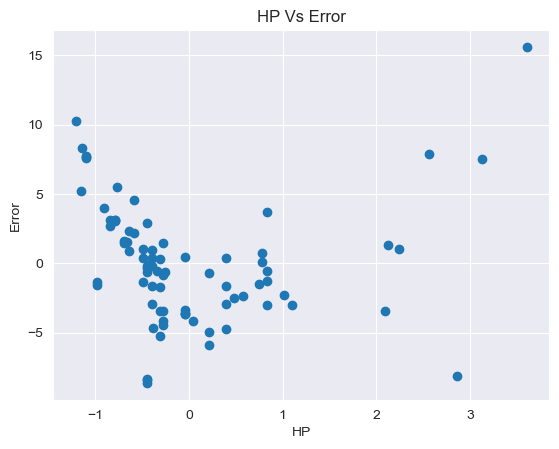

In [ ]:
plt.scatter(x=scaled_X['HP'],y=error)
plt.title('HP Vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

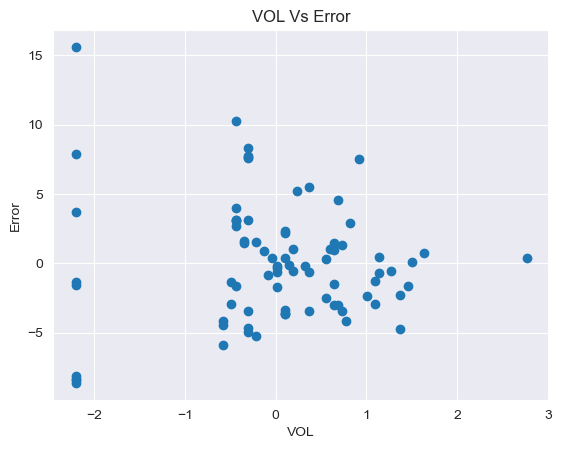

In [ ]:
plt.scatter(x=scaled_X['VOL'],y=error)
plt.title('VOL Vs Error')
plt.xlabel('VOL')
plt.ylabel('Error')
plt.show()

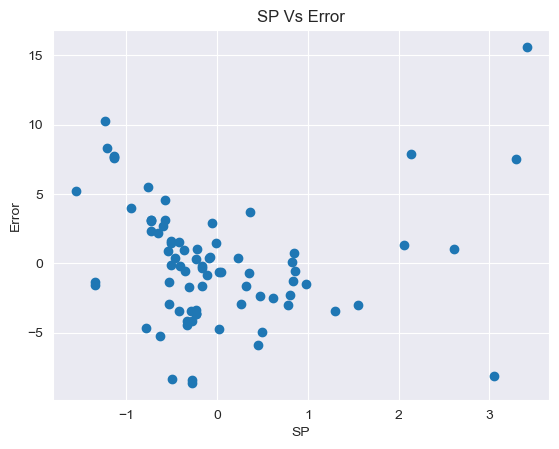

In [ ]:
plt.scatter(x=scaled_X['SP'],y=error)
plt.title('SP Vs Error')
plt.xlabel('SP')
plt.ylabel('Error')
plt.show()

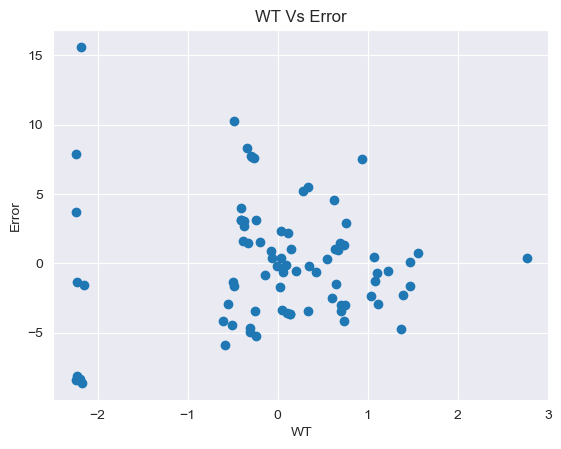

In [ ]:
plt.scatter(x=scaled_X['WT'],y=error)
plt.title('WT Vs Error')
plt.xlabel('WT')
plt.ylabel('Error')
plt.show()

##### Homoscedasticity Check is Failed.

#### Zero Residual Mean across the Fitted Line.

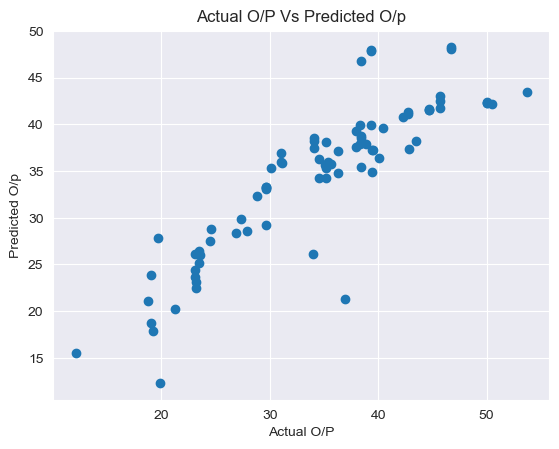

In [ ]:
plt.scatter(x=y,y=y_pred)
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

##### Zero Residual Mean Test is also Failed.

In [ ]:
#8. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_squared_error(y,y_pred)

18.897141152343103

In [ ]:
mean_absolute_error(y,y_pred)

3.267968285420799

## TRANSFORMATIONS:


Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding Hot Encoding

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load your data
cars_data = pd.read_csv("Cars.csv")

# Apply transformations
transformations = ['log', 'sqrt', 'cbrt', 'reciprocal', 'boxcox', 'scaled', 'minmax', 'robust']
for var in ['HP', 'VOL', 'SP', 'WT']:
    for trans in transformations:
        if trans == 'log':
            cars_data[f'{var}_log'] = np.log(cars_data[var])
        elif trans == 'sqrt':
            cars_data[f'{var}_sqrt'] = np.sqrt(cars_data[var])
        elif trans == 'cbrt':
            cars_data[f'{var}_cbrt'] = np.cbrt(cars_data[var])
        elif trans == 'reciprocal':
            cars_data[f'{var}_reciprocal'] = 1 / cars_data[var]
        elif trans == 'boxcox':
            # Adding a small value to avoid issues with zero or negative values
            positive_data = cars_data[var] + 1
            cars_data[f'{var}_boxcox'], _ = stats.boxcox(positive_data)
        elif trans == 'scaled':
            scaler = StandardScaler()
            cars_data[f'{var}_scaled'] = scaler.fit_transform(cars_data[[var]])
        elif trans == 'minmax':
            min_max_scaler = MinMaxScaler()
            cars_data[f'{var}_minmax'] = min_max_scaler.fit_transform(cars_data[[var]])
        elif trans == 'robust':
            robust_scaler = RobustScaler()
            cars_data[f'{var}_robust'] = robust_scaler.fit_transform(cars_data[[var]])

# Split the Data
X = cars_data.drop('MPG', axis=1)  # Assuming 'MPG' is the target variable
y = cars_data['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Multiple Models

In [ ]:
model_results = {}
for col in X_train.columns:
    lr = LinearRegression()
    lr.fit(X_train[[col]], y_train)
    y_pred = lr.predict(X_test[[col]])
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    model_results[col] = {'RMSE': rmse, 'R2': r2}

### Choose the Best Model

In [ ]:
best_model = min(model_results, key=lambda k: model_results[k]['RMSE'])

### Output the result

In [ ]:
print(f"The best model is based on the variable: {best_model}")
print(f"RMSE: {model_results[best_model]['RMSE']}, R2: {model_results[best_model]['R2']}")

The best model is based on the variable: HP_boxcox
RMSE: 3.4674079635449218, R2: 0.877737395465098
